In [91]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Generate data

In [92]:
SEED = 1234
NUM_SAMPLES = 50

In [93]:
# Set seed for reproducibility
np.random.seed(seed=SEED)

In [94]:
# Generate syntetic data
def generate_data(num_samples):
    """Generate dummy data for linear regression."""
    X = np.array(range(num_samples))
    random_noise = np.random.uniform(-10, 20, size=num_samples)
    y = 3.5*X + random_noise # add some noise
    return X, y

In [95]:
# Generate random (linear) data
X, y = generate_data(num_samples=NUM_SAMPLES)
data = np.vstack([X, y]).T
print (data[:5])

[[ 0.         -4.25441649]
 [ 1.         12.16326313]
 [ 2.         10.13183217]
 [ 3.         24.06075751]
 [ 4.         27.39927424]]


In [96]:
# Load into a pandas DataFrame
df = pd.DataFrame(data=data, columns=["x", "y"])
X = df[['x']].values
y = df[['y']].values
df.head()

,x,y
0,0.0,-4.254416
1,1.0,12.163263
2,2.0,10.131832
3,3.0,24.060758
4,4.0,27.399274


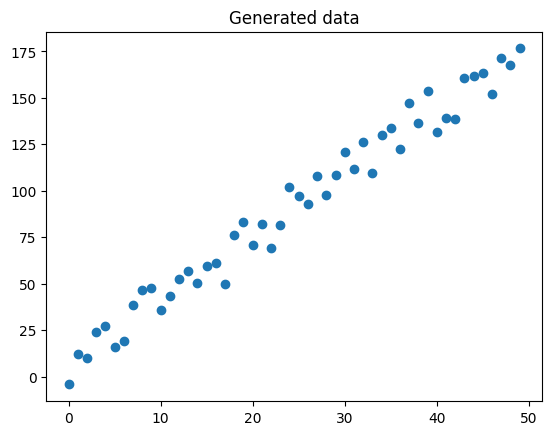

In [97]:
# Scatter plot
plt.title('Generated data')
plt.scatter(x=df['x'], y=df['y'])
plt.show()

### Numpy

Split data

In [98]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [99]:
#  shuffle data
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [100]:
# Split indices
train_start = 0
train_end = int(TRAIN_SIZE*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

In [101]:
# split data
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_test: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (35, 1), y_train: (35, 1)
X_val: (7, 1), y_test: (7, 1)
X_test: (8, 1), y_test: (8, 1)


Standardize data

In [102]:
def standardize_data(data, mean, std):
    return (data - mean)/std

In [103]:
# Determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [104]:
# standardize 
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

In [105]:
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: -0.6, std: 0.9
mean: -0.6, std: 0.9


Weights

In [106]:
INPUT_DIM = X_train.shape[1] # X is 1-dimentional
OUTPUT_DIM = y_train.shape[1] # y is 1-dimensional

In [107]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, 1))
print (f"W: {W.shape}")
print (f"b: {b.shape}")

W: (1, 1)
b: (1, 1)


Model

In [108]:
# Forward pass [NX1] · [1X1] = [NX1]
y_pred = np.dot(X_train, W) + b
print(f"y_pred: {y_pred.shape}")

y_pred: (35, 1)


loss

In [109]:
# loss
N = len(y_train)
loss = (1/N) * np.sum((y_train - y_pred)**2)
print(f"Loss: {loss:.2f}")

Loss: 0.99


Gradient

In [110]:
# Backpropagration
dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
db = -(2/N) * np.sum((y_train - y_pred) * 1)

Update weights

In [111]:
LEARNING_RATE = 1e-1

In [112]:
# update weights
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db

Training

In [113]:
NUM_EPOCHS = 100

In [114]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, ))

# Training loop
for epoch_num in range(NUM_EPOCHS):

    # Forward pass [NX1] . [1x1] = [NX1]
    y_pred = np.dot(X_train, W) + b

    # Loss
    loss =(1/len(y_train) * np.sum((y_train - y_pred)**2))
    
    # show progress
    if epoch_num%10==0:
        print (f"Epoch: {epoch_num}, loss: {loss:.3f}")

    # backpropagation
    dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
    db = -(2/N) * np.sum((y_train - y_pred) * 1)

    # Update weights
    W += -LEARNING_RATE * dW
    b += -LEARNING_RATE * b

Epoch: 0, loss: 0.990
Epoch: 10, loss: 0.039
Epoch: 20, loss: 0.028
Epoch: 30, loss: 0.028
Epoch: 40, loss: 0.028
Epoch: 50, loss: 0.028
Epoch: 60, loss: 0.028
Epoch: 70, loss: 0.028
Epoch: 80, loss: 0.028
Epoch: 90, loss: 0.028


Evaluation

In [115]:
# prediction
pred_train = W*X_train + b
pred_test = W*X_test + b

In [116]:
# Train and test MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)

print (f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")

train_MSE: 0.03, test_MSE: 0.01


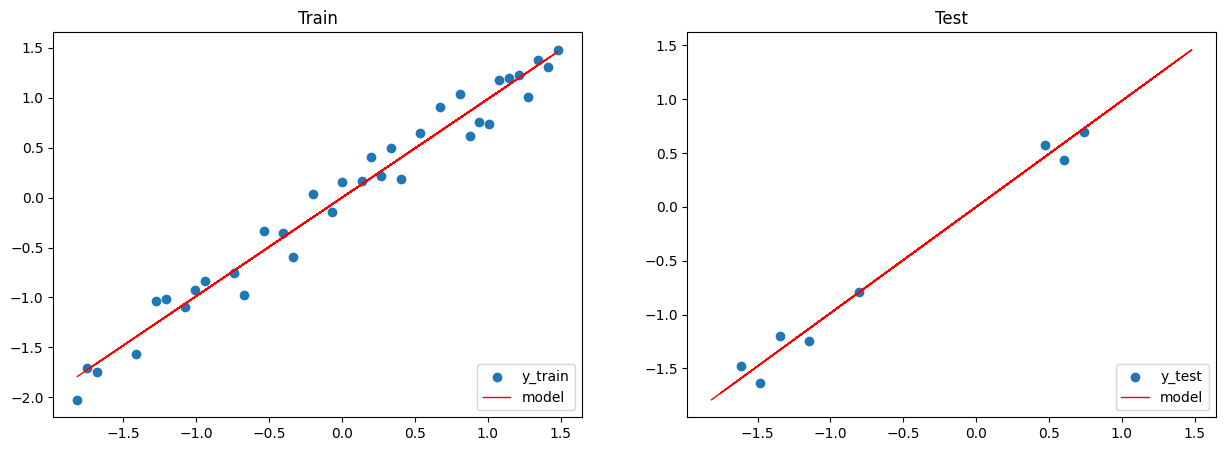

In [117]:
# figure size
plt.figure(figsize=(15, 5))

# plot train data
plt.subplot(1, 2, 1)
plt.title('Train')
plt.scatter(X_train, y_train, label='y_train')
plt.plot(X_train, pred_train, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# plot test data
plt.subplot(1, 2, 2)
plt.title('Test')
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_train, pred_train, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

plt.show()

Intepretation

In [118]:
# Unscaled weights
w_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - np.sum((w_unscaled*X_mean))

print ('[Actual] y = 3.5X + noise')
print (f'[model] y_hat = {w_unscaled[0][0]:.1f}x + {b_unscaled[0]:.1f}')

[Actual] y = 3.5X + noise
[model] y_hat = 3.4x + 7.8


### Pytorch

set up

In [119]:
import torch
from torch import nn

In [120]:
# Set seed for reproducibility
torch.manual_seed(SEED)

split data

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [123]:
# split (train)
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=TRAIN_SIZE)

In [124]:
print (f"train: {len(X_train)} ({len(X_train) / len(X)})\n"
       f"remaining: {len(X_)} ({len(X_) / len(X)})")

train: 35 (0.7)
remaining: 15 (0.3)


In [125]:
# split test
X_val, X_test, y_val, y_test = train_test_split(
    X_, y_, train_size=0.5
)

In [126]:
print (
    f"train: {len(X_train)} ({len(X_train) / len(X)})\n"
    f"val: {len(X_val)} ({len(X_val) / len(X)})\n"
    f"test: {len(X_test)} ({len(X_test) / len(X)})\n"
    )

train: 35 (0.7)
val: 7 (0.14)
test: 8 (0.16)



Standardize data

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
# standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [129]:
# Apply scaller on training and test data
X_train = X_scaler.transform(X_train)
y_train = y_scaler.transform(y_train).ravel().reshape(-1, 1)
X_val = X_scaler.transform(X_val)
y_val = y_scaler.transform(y_val).ravel().reshape(-1, 1)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test).ravel().reshape(-1, 1)

In [130]:
# check (means should be ~0 and std should ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f} std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: -0.5 std: 0.8
mean: -0.5, std: 0.8


Weights

In [131]:
# Inputs
N = 3 # num samples
x = torch.randn(N, INPUT_DIM)
print (x.shape)
print (x.numpy())

torch.Size([3, 1])
[[ 0.04613046]
 [ 0.40240282]
 [-1.0115291 ]]


In [132]:
# Weights
m = nn.Linear(INPUT_DIM, OUTPUT_DIM)
print(m)
print(f"weights ({m.weight.shape}): {m.weight[0][0]:.2f}")
print(f"bias ({m.bias.shape}): {m.bias[0]:.2f}")

Linear(in_features=1, out_features=1, bias=True)
weights (torch.Size([1, 1])): 0.35
bias (torch.Size([1])): -0.34


In [133]:
# forward pass
z = m(x)
print(z.shape)
print(z.detach().numpy())

torch.Size([3, 1])
[[-0.32104054]
 [-0.19719592]
 [-0.68869597]]


Model

In [134]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.fc1 = nn.Linear(input_dim, output_dim)

    def forward(self, x_in):
        y_pred = self.fc1(x_in)
        return y_pred

In [135]:
# Initialize the model
model = LinearRegression(input_dim=INPUT_DIM, output_dim=OUTPUT_DIM)
print(model.named_parameters)

<bound method Module.named_parameters of LinearRegression(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)>


Loss

In [140]:
loss_fn = nn.MSELoss()
y_pred = torch.Tensor([0., 0., 1., 1.])
y_true =  torch.Tensor([1., 1., 1., 0.])
loss = loss_fn(y_pred, y_true)
print("Loss: ", loss.numpy())

Loss:  0.75


Optimizer

In [141]:
from torch.optim import Adam

In [142]:
# Optimizer
optimizer = Adam(model.parameters(), lr=LEARNING_RATE)

In [143]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    weight_decay: 0
)

Training

In [144]:
# Convert data to tensors
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)
X_val = torch.Tensor(X_val)
y_val = torch.Tensor(y_val)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

In [146]:
# Training
for epoch in range(NUM_EPOCHS):
    # forward pass
    y_pred = model(X_train)

    # Loss
    loss = loss_fn(y_pred, y_train)

    # Zero all gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    if epoch%20==0:
        print(f"Epoch: {epoch} | loss: {loss:.2f}")

Epoch: 0 | loss: 0.22
Epoch: 20 | loss: 0.03
Epoch: 40 | loss: 0.02
Epoch: 60 | loss: 0.02
Epoch: 80 | loss: 0.02


Evaluation

In [147]:
# predictions
pred_train = model(X_train)
pred_test = model(X_test)

In [148]:
# Perfomance
train_error = loss_fn(pred_train, y_train)
test_error = loss_fn(pred_test, y_test)
print(f"train_error: {train_error:.2f}")
print(f"test_error: {test_error:.2f}")

train_error: 0.02
test_error: 0.01


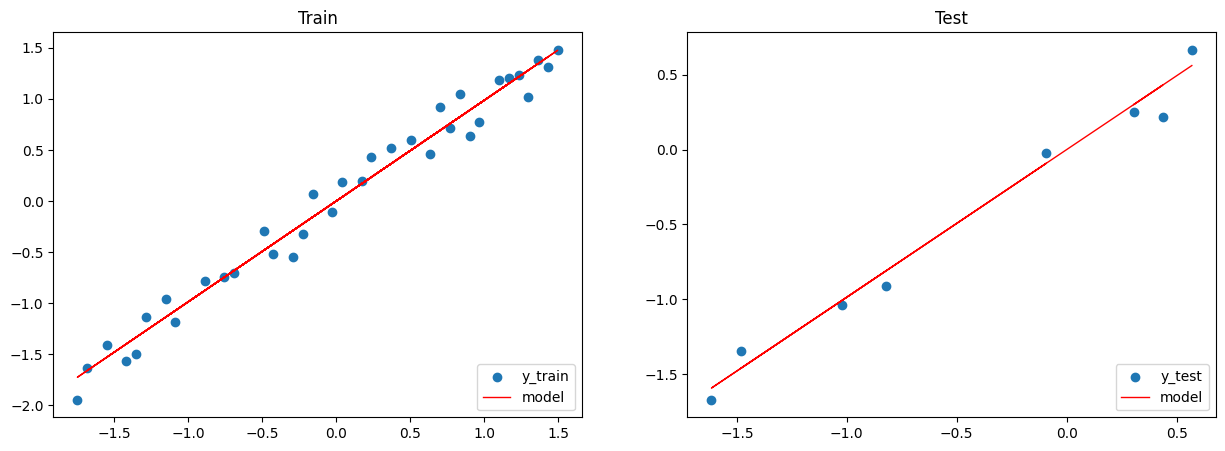

In [153]:
# Figure size
plt.figure(figsize=(15, 5))

# plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train.detach().numpy(), color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label="y_test")
plt.plot(X_test, pred_test.detach().numpy(), color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

plt.show()

Inference

In [155]:
# Feed in your own inputs
sample_indices = [10, 15, 25]
x_infer = np.array(sample_indices, dtype=np.float32)
x_infer = torch.Tensor(X_scaler.transform(x_infer.reshape(-1, 1)))

In [161]:
# Unstandardize predictions
pred_infer = model(x_infer).detach().numpy() * np.sqrt(y_scaler.var_) + y_scaler.mean_
for i, index in enumerate(sample_indices):
    print(f"{df.iloc[index]['y']:.2f} (actual) : {pred_infer[i][0]:.2f} (predicted)")

35.73 (actual) : 41.86 (predicted)
59.34 (actual) : 59.10 (predicted)
97.04 (actual) : 93.58 (predicted)


Interpretability

In [168]:
# Unstandardize coefficients
W = model.fc1.weight.detach().numpy()[0][0]
b = model.fc1.bias.detach().numpy()[0]
W_unscaled = W * (y_scaler.scale_/X_scaler.scale_)
b_unscaled = b * y_scaler.scale_ + y_scaler.mean_ - np.sum(W_unscaled * X_scaler.mean_)

print ("[actual] y = 3.5X + noise")
print (f"[model] y_hat = {W_unscaled[0]:.1f}X + {b_unscaled[0]:.1f}")

[actual] y = 3.5X + noise
[model] y_hat = 3.4X + 7.4


Regularization

In [169]:
L2_LAMDA =1e-2

In [170]:
# Initialize the model
model = LinearRegression(input_dim=INPUT_DIM, output_dim=OUTPUT_DIM)

In [171]:
# Optimizer
optimizer = Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=L2_LAMDA)

In [172]:
# Training
for epoch in range(NUM_EPOCHS):
    # Forward pass
    y_pred = model(X_train)

    # Loss
    loss = loss_fn(y_pred, y_train)

    # Zero all gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    if epoch%20==0:
        print(f"Epoch: {epoch} | Loss: {loss:.2f}")

Epoch: 0 | Loss: 0.63
Epoch: 20 | Loss: 0.04
Epoch: 40 | Loss: 0.02
Epoch: 60 | Loss: 0.02
Epoch: 80 | Loss: 0.02


In [173]:
# Predictions
pred_train = model(X_train)
pred_test = model(X_test)

In [174]:
# Perfomance
train_error = loss_fn(pred_train, y_train)
test_error = loss_fn(pred_test, y_test)
print(
    f"train_error: {train_error:.2f}\n"
    f"test_error: {test_error:.2f}"
)

train_error: 0.02
test_error: 0.01
